In [1]:
import os
os.environ['PROJ_LIB'] = '/opt/conda/share/proj'

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from mpl_toolkits.basemap import Basemap
from ipywidgets import widgets

In [2]:
textBox = widgets.Text()

In [3]:
import os

display(textBox)
df = pd.DataFrame()

# First collect the documents:
print("Reading weather data files")
path = './statsdb/'

for (path, dirlist, files) in os.walk(path):
    print(f'Found directory: {path}')
    
    for file in files:
        if file[0] not in '.abcd':  # Don't process hidden files
            continue

        df_temp = pd.read_csv(f'{path}/{file}')
        iceberg = file[:file.find('.')]
        df_temp['iceberg'] = iceberg
        df = df.append(df_temp, ignore_index=True)
        textBox.value = f'{file} imported, ({len(df_temp)} lines)'
            
print(f'{len(files)} weather files read. Total number of rows = {len(df)}')

Text(value='')

Reading weather data files
Found directory: ./statsdb/
522 weather files read. Total number of rows = 253513


In [4]:
df.head()

,date,date_gap,disp,flags,lat,lon,mask,size,vel_angle,iceberg
0,1978204,0,0.000,257,-60.219,-48.483,0,10.0,0.0,a01
1,1978205,1,0.331,257,-60.218,-48.488,0,10.0,0.0,a01
2,1978206,1,0.326,257,-60.217,-48.493,0,10.0,0.0,a01
3,1978207,1,0.332,257,-60.215,-48.498,0,10.0,0.0,a01
4,1978208,1,0.326,257,-60.214,-48.504,0,10.0,0.0,a01


In [15]:
def ShowPaths(df_icebergs, w=12000000, h=12000000):
    plt.figure(figsize=(8,8))
    m = Basemap(projection='aeqd', resolution='l', lat_0=-90, lon_0=-138, width=w, height=h)

    m.drawmeridians(np.arange(0,360,15), labels=[False, False, False, True])
    m.drawparallels(np.arange(-90,90,10), labels=[True, False, False, False])

    x, y = m(df_icebergs['lon'].values, df_icebergs['lat'].values)
    m.scatter(x, y, 3, marker='.', color='r')

    df_lastpos = df_icebergs.groupby(['iceberg'])['lon', 'lat'].last()
    x, y = m(df_lastpos['lon'].values, df_lastpos['lat'].values)
    m.scatter(x, y, 20, marker='o', color='yellow')
    
    m.bluemarble(scale=0.5)
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


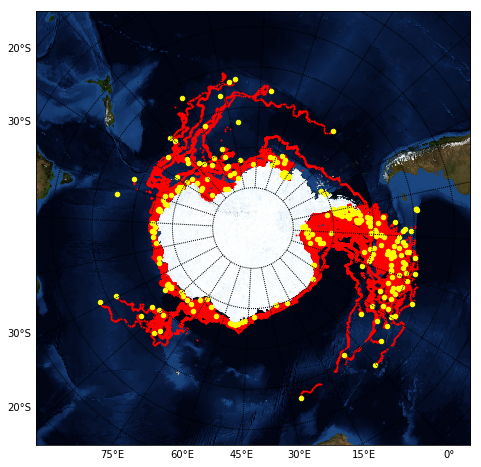

In [8]:
ShowPaths(df)

In [11]:
# Get a list of of all the icebergs that still exist
dfCurrent = df[df['date'] == 2017151]
currentList = dfCurrent['iceberg'].values
currentList

array(['a57a', 'a57b', 'a61', 'a63', 'a64', 'b09b', 'b09d', 'b09f',
       'b09g', 'b09h', 'b09i', 'b15aa', 'b15ab', 'b15t', 'b15z', 'b16',
       'b22a', 'b28', 'b29', 'b30', 'b31', 'b35', 'b37', 'b38', 'b39',
       'b40', 'c15', 'c18b', 'c21b', 'c24', 'c28b', 'c29', 'c30', 'c31',
       'c32', 'c33'], dtype=object)

In [12]:
# Filter the original list by this
dfCurrent = df[df['iceberg'].isin(currentList)]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


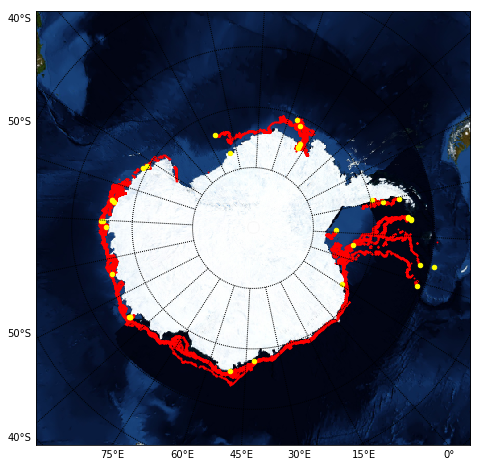

In [14]:
ShowPaths(dfCurrent, 8000000, 8000000)

In [14]:
dfCurrent.groupby('iceberg')['lat', 'lon'].count()

,lat,lon
iceberg,,
a57a,498,498
a57b,501,501
a61,2629,2629
a63,1634,1634
a64,1071,1071
b09b,9227,9227
b09d,2214,2214
b09f,2102,2102
b09g,1836,1836
